# EKSPERYMENT
# Analiza zysków z filmów

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('9246634-cost-revenue-dirty.csv')
df.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


## Analiza wstępna

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release Date           5391 non-null   object
 2   Movie Title            5391 non-null   object
 3   Production Budget ($)  5391 non-null   object
 4   Worldwide Gross ($)    5391 non-null   object
 5   Domestic Gross ($)     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [5]:
df.describe()

,Rank
count,5391.000000
mean,2696.000000
std,1556.391981
min,1.000000
25%,1348.500000
50%,2696.000000
75%,4043.500000
max,5391.000000


## Wstępne wnioski
5391 rekordów, 6 kolumn. Dane są kompletne. Kolumna domestic gross nie będzie nas interesowała- chodzi nam o zyski na całym świecie. Tytuły też nie są potrzebne. Jako że celem jest wyznaczenie zysków tylko na podstawie kosztów to kolumna z datą premiery też zostanie usunięta.

## Analiza szczegółowa

In [22]:
df = df.drop(['Rank', 'Release Date', 'Movie Title', 'Domestic Gross ($)'], axis = 1)

In [7]:
df.head()

,Production Budget ($),Worldwide Gross ($)
0,"$110,000","$11,000,000"
1,"$385,907",$0
2,"$200,000","$8,000,000"
3,"$100,000","$3,000,000"
4,"$245,000","$22,000,000"


Zostają tylko dwie kolumny, trzeba tylko usunąć znak $ oraz przecinek.

In [42]:
for i in range(len(df)):
    df['Production Budget ($)'][i] = df['Production Budget ($)'][i].replace('$', '')
    df['Production Budget ($)'][i] = df['Production Budget ($)'][i].replace(',', '')    
    df['Worldwide Gross ($)'][i] = df['Worldwide Gross ($)'][i].replace('$', '')
    df['Worldwide Gross ($)'][i] = df['Worldwide Gross ($)'][i].replace(',', '')  

In [52]:
df['Production Budget ($)'] = pd.to_numeric(df['Production Budget ($)'])
df['Worldwide Gross ($)'] = pd.to_numeric(df['Worldwide Gross ($)'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Production Budget ($)  5391 non-null   int64
 1   Worldwide Gross ($)    5391 non-null   int64
dtypes: int64(2)
memory usage: 84.4 KB


Zmienimy nazwy na coś krótszego

In [56]:
df['Budget'] = df['Production Budget ($)']
df['Gross'] = df['Worldwide Gross ($)']
df = df.drop(['Production Budget ($)', 'Worldwide Gross ($)'], axis = 1)
df.head()

,Budget,Gross
0,110000,11000000
1,385907,0
2,200000,8000000
3,100000,3000000
4,245000,22000000


(0.0, 450000000.0)

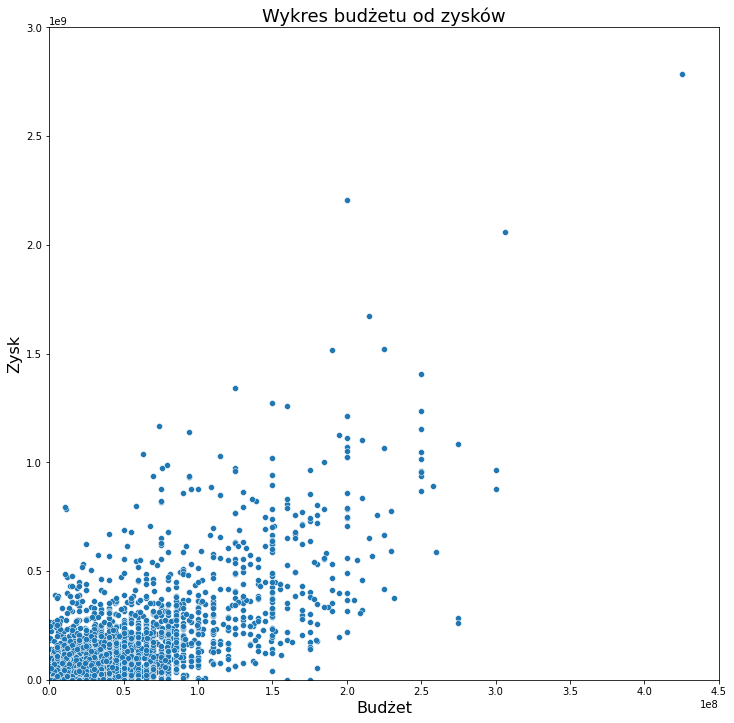

In [69]:
plt.figure(figsize=(12,12))

sns.scatterplot(x='Budget', y='Gross', data = df)
plt.title('Wykres budżetu od zysków', fontsize=18)
plt.xlabel('Budżet', fontsize=16)
plt.ylabel('Zysk', fontsize=16)
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)

Widać zależność - wraz z budżetem rośnie szansa na większy zysk.

## Przygotowanie do ML

In [184]:
X = df.Budget
y= df.Gross
X = pd.array(X).reshape(-1, 1)
y = pd.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)

## Modelowanie EKSPERYMENTALNE!

Wynik: 0.5518848068238047


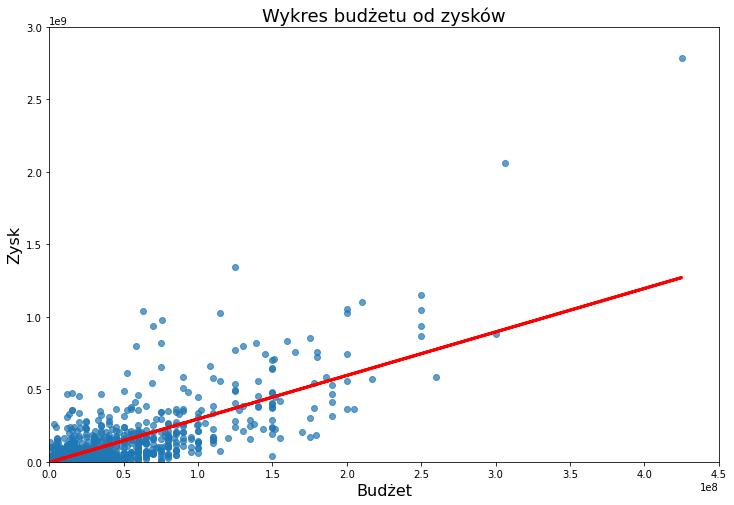

In [193]:
model = LinearRegression()
model.fit(X_train, y_train)
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test, alpha=0.7)

# Adding the regression line here:
plt.plot(X_test, model.predict(X_test), color='red', linewidth=3)

plt.title('Wykres budżetu od zysków', fontsize=18)
plt.xlabel('Budżet', fontsize=16)
plt.ylabel('Zysk', fontsize=16)
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
print(f'Wynik: {model.score(X,y)}')


Wynik: 0.6055234101006943


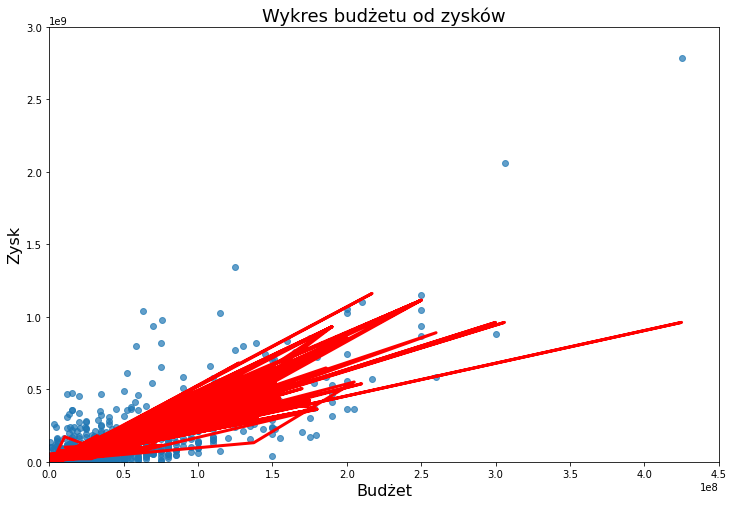

In [206]:
model = XGBRegressor(n_estimators = 100, max_depth = 7, min_child_weight = 1)
model.fit(X_train, y_train)
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test, alpha=0.7)

# Adding the regression line here:
plt.plot(X_test, model.predict(X_test), color='red', linewidth=3)

plt.title('Wykres budżetu od zysków', fontsize=18)
plt.xlabel('Budżet', fontsize=16)
plt.ylabel('Zysk', fontsize=16)
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
print(f'Wynik: {model.score(X,y)}')


Wynik: 0.5813754694343254


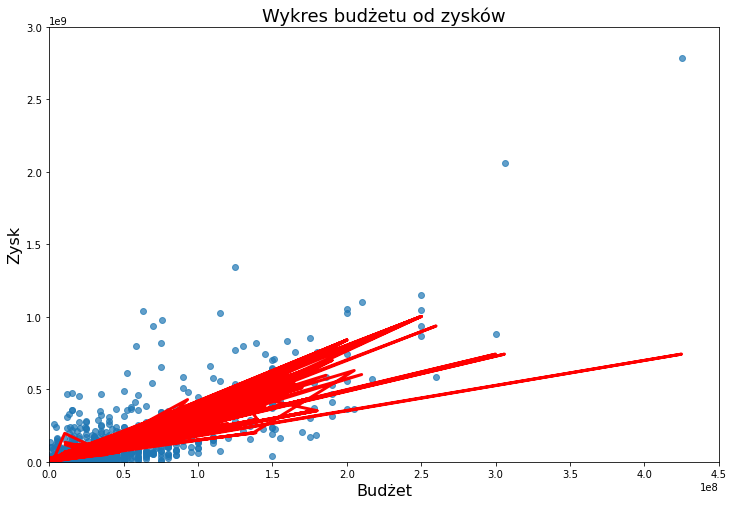

In [198]:
model = RandomForestRegressor(max_depth = 10, min_samples_leaf = 3)
model.fit(X_train, y_train)
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test, alpha=0.7)

# Adding the regression line here:
plt.plot(X_test, model.predict(X_test), color='red', linewidth=3)

plt.title('Wykres budżetu od zysków', fontsize=18)
plt.xlabel('Budżet', fontsize=16)
plt.ylabel('Zysk', fontsize=16)
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
print(f'Wynik: {model.score(X,y)}')

Wynik: 0.5518848068238046


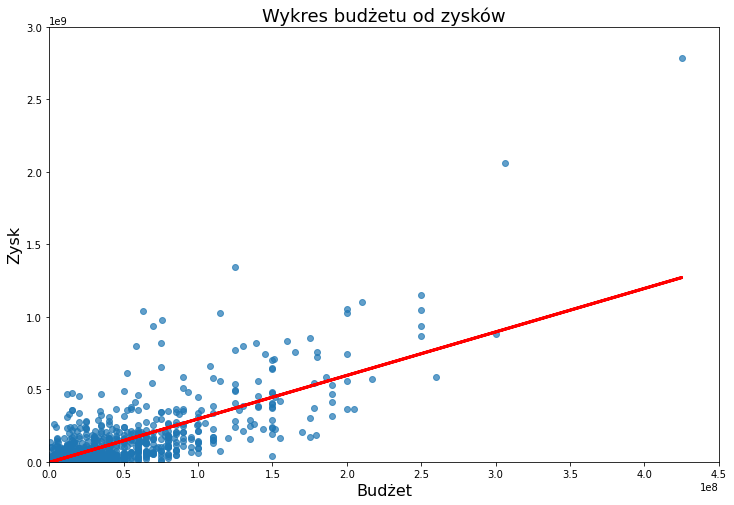

In [199]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train, y_train)
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test, alpha=0.7)

# Adding the regression line here:
plt.plot(X_test, model.predict(X_test), color='red', linewidth=3)

plt.title('Wykres budżetu od zysków', fontsize=18)
plt.xlabel('Budżet', fontsize=16)
plt.ylabel('Zysk', fontsize=16)
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
print(f'Wynik: {model.score(X,y)}')

## Wnioski
Standardowo XGB wygrywa. Notebook jest eksperymentalny- chciałem sobie zobaczyć te wykresiki :)